# TC 5033
## Deep Learning
## Convolutional Neural Networks
<br>

#### Activity 2b: Building a CNN for CIFAR10 dataset with PyTorch
<br>

- Objective

    The main goal of this activity is to further your understanding of Convolutional Neural Networks (CNNs) by building one using PyTorch. You will apply this architecture to the famous CIFAR10 dataset, taking what you've learned from the guide code that replicated the Fully Connected model in PyTorch (Activity 2a).

- Instructions
    This activity requires submission in teams of 5 or 6 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Understand the Guide Code: Review the guide code from Activity 2a that implemented a Fully Connected model in PyTorch. Note how PyTorch makes it easier to implement neural networks.

    Familiarize Yourself with CNNs: Take some time to understand their architecture and the rationale behind using convolutional layers.

    Prepare the Dataset: Use PyTorch's DataLoader to manage the dataset. Make sure the data is appropriately preprocessed for a CNN.

    Design the CNN Architecture: Create a new architecture that incorporates convolutional layers. Use PyTorch modules like nn.Conv2d, nn.MaxPool2d, and others to build your network.

    Training Loop and Backpropagation: Implement the training loop, leveraging PyTorch’s autograd for backpropagation. Keep track of relevant performance metrics.

    Analyze and Document: Use Markdown cells to explain your architectural decisions, performance results, and any challenges you faced. Compare this model with your previous Fully Connected model in terms of performance and efficiency.

- Evaluation Criteria

    - Understanding of CNN architecture and its application to the CIFAR10 dataset
    - Code Readability and Comments
    - Appropriateness and efficiency of the chosen CNN architecture
    - Correct implementation of Traning Loop and Accuracy Function
    - Model's performance metrics on the CIFAR10 dataset (at least 65% accuracy)
    - Quality of Markdown documentation

- Submission

Submit via Canvas your Jupyter Notebook with the CNN implemented in PyTorch. Your submission should include well-commented code and Markdown cells that provide a comprehensive view of your design decisions, performance metrics, and learnings.


---


**Team Members:**


*   Sergio Castro Reynoso
*   Israel campos Báez
*   Andrés Castillo Nassar
*   Dante César Cervantes Gutiérrez
*  Alan Camerino Cortés Cruz


In [4]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as datasets
import torchvision.transforms as T
import matplotlib.pyplot as plt
#only if you have jupyterthemes
#from jupyterthemes import jtplot
#jtplot.style()

### Download Cifar10 dataset

In [5]:
torch.cuda.is_available()

False

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#Define the path to the directory
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/MNA/Advanced Machine Learning Methods/Activity 2b/media/cifar10'

#Define the number of images to use for training, validation, and testing
NUM_TRAIN = 50000
NUM_VAL = 5000
NUM_TEST = 5000

#Set the minibatch zie for data loading
MINIBATCH_SIZE = 64

#Define image transformation pipeline
transform_cifar = T.Compose([
                T.ToTensor(),
                T.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261])
            ])

# Train dataset
cifar10_train = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                             transform=transform_cifar)
train_loader = DataLoader(cifar10_train, batch_size=MINIBATCH_SIZE,
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))
#Validation set
cifar10_val = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                           transform=transform_cifar)
val_loader = DataLoader(cifar10_val, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL)))
#Test set
cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                            transform=transform_cifar)
test_loader = DataLoader(cifar10_test, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL, len(cifar10_test))))

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [8]:
cifar10_train

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /content/drive/MyDrive/Colab Notebooks/MNA/Advanced Machine Learning Methods/Activity 2b/media/cifar10
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.491, 0.482, 0.447], std=[0.247, 0.243, 0.261])
           )

In [9]:
train_loader.batch_size

64

In [10]:
#for i, (x, y) in enumerate(train_loader):
    #print(x, y)

### Using  GPUs

In [11]:
# Set the device to GPU if available, otherwise fall back to CPU
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(device)

cpu


### Mostrar imágenes

La imagen muestreada representa un: cat


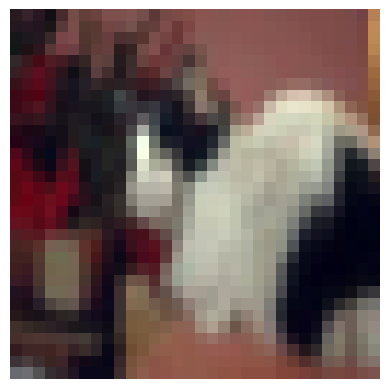

In [12]:
# Randomly sample an image from the test set, display it, and print its corresponding class label
classes = test_loader.dataset.classes
def plot_figure(image):
    plt.imshow(np.transpose(image,(1,2,0)))
    plt.axis('off')
    plt.show()

rnd_sample_idx = np.random.randint(len(test_loader))
print(f'La imagen muestreada representa un: {classes[test_loader.dataset[rnd_sample_idx][1]]}')

# Retrieve and normalize the sampled image
image = test_loader.dataset[rnd_sample_idx][0]
image = (image - image.min()) / (image.max() -image.min() )
plot_figure(image)


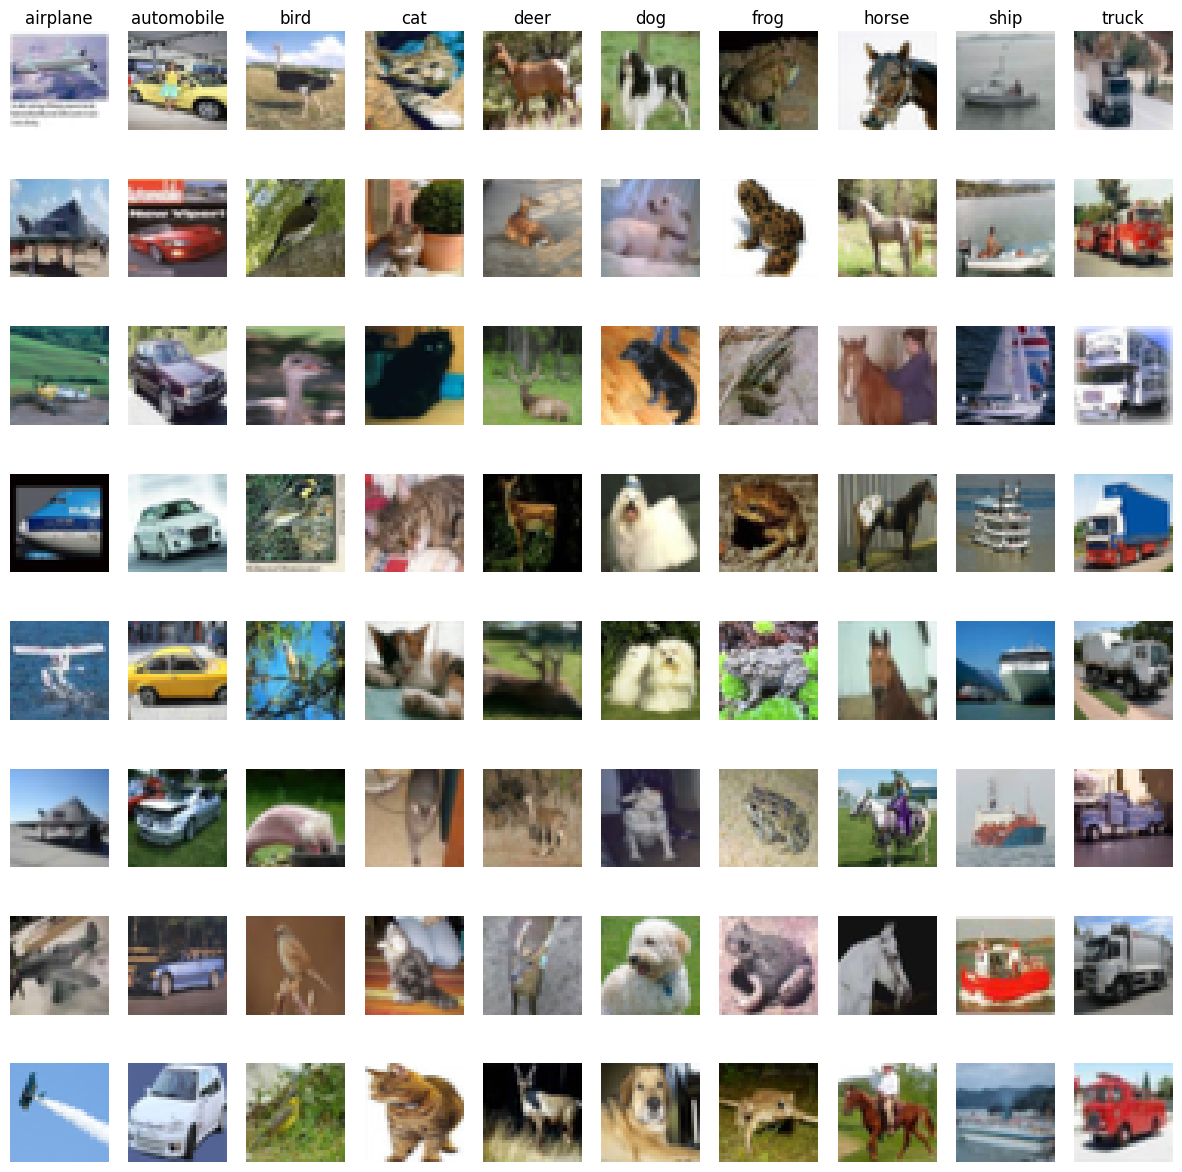

In [13]:
# Display a grid of random CIFAR-10 images, with multiple samples from each class
def plot_cifar10_grid():
    classes = test_loader.dataset.classes
    total_samples = 8
    plt.figure(figsize=(15,15))
    for label, sample in enumerate(classes):
        class_idxs = np.flatnonzero(label == np.array(test_loader.dataset.targets))
        sample_idxs = np.random.choice(class_idxs, total_samples, replace = False)
        for i, idx in enumerate(sample_idxs):
            plt_idx = i*len(classes) + label + 1
            plt.subplot(total_samples, len(classes), plt_idx)
            plt.imshow(test_loader.dataset.data[idx])
            plt.axis('off')

            if i == 0: plt.title(sample)
    plt.show()

plot_cifar10_grid()

### Calcular accuracy


In [14]:
# Calculate the accuracy of the model by comparing its predictions to the true labels
def accuracy(model, loader):
  num_correct = 0
  num_total = 0
  model.eval()
  model = model.to(device=device)
  with torch.no_grad():
    for x, y in loader:
      x = x.to(device=device, dtype=torch.float32)
      y = y.to(device=device, dtype=torch.long)
      scores = model(x)
      _, preds = scores.max(dim=1)
      num_correct += (preds == y).sum()
      num_total += preds.size(0)
    return float(num_correct)/num_total


### Loop de entrenamiento

In [15]:
# Train the model for a specified number of epochs (100), updating weights using the optimizer and tracking accuracy
def train(model, optimiser, epochs=100):
    model = model.to(device=device)
    for epoch in range(epochs):
        for t, (x, y) in enumerate(train_loader):
            model.train()
            x = x.to(device=device, dtype=torch.float32)
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            cost = F.cross_entropy(input=scores, target=y)
            optimiser.zero_grad()
            cost.backward()
            optimiser.step()
        acc = accuracy(model, val_loader)
        print(f'Epoch: {epoch}, Cost: {cost.item()}, Accuracy: {acc}')


### Linear model

In [16]:
# Define a simple fully connected neural network model with 3 hidden layers and ReLU activations, and set up the Adam optimizer
hidden1 = 256
hidden2 = 128
hidden3 = 64
out = 10
lr = 1e-3
epochs = 10
model1 = nn.Sequential(nn.Flatten(),
                    nn.Linear(in_features=32*32*3, out_features=hidden1),
                    nn.ReLU(),
                    nn.Linear(in_features=hidden1, out_features=hidden2),
                    nn.ReLU(),
                    nn.Linear(in_features=hidden2, out_features=hidden3),
                    nn.ReLU(),
                    nn.Linear(in_features=hidden3, out_features=out))
optimiser = torch.optim.Adam(model1.parameters(), lr=lr)

In [17]:
# Train the defined model1 using the specified optimizer and number of epochs
train(model1, optimiser, epochs)

Epoch: 0, Cost: 1.2440484762191772, Accuracy: 0.4682
Epoch: 1, Cost: 1.8212791681289673, Accuracy: 0.4972
Epoch: 2, Cost: 1.5463515520095825, Accuracy: 0.5266
Epoch: 3, Cost: 1.1247698068618774, Accuracy: 0.5306
Epoch: 4, Cost: 1.2834243774414062, Accuracy: 0.529
Epoch: 5, Cost: 0.864932656288147, Accuracy: 0.5256
Epoch: 6, Cost: 1.328558325767517, Accuracy: 0.5416
Epoch: 7, Cost: 0.5944895148277283, Accuracy: 0.5338
Epoch: 8, Cost: 0.8393614292144775, Accuracy: 0.5322
Epoch: 9, Cost: 0.8957358598709106, Accuracy: 0.538


### Sequential CNN

In [18]:
# Define a simple Convolutional Neural Network (CNN) model with two convolutional layers, ReLU activations, max pooling, and a fully connected layer, and set up the Adam optimizer
channel1 = 16
channel2 = 32
kernel_size = 3
out_cnn = 10
lr = 1e-3
epochs = 10

# Define the CNN architecture
modelCNN1 = nn.Sequential(nn.Conv2d(in_channels=3, out_channels=channel1, kernel_size=kernel_size, padding=1),
                          nn.ReLU(),
                          nn.Conv2d(in_channels=channel1, out_channels=channel2, kernel_size=kernel_size, padding=1),
                          nn.ReLU(),
                          nn.MaxPool2d(kernel_size=2, stride=2),
                          nn.Flatten(),
                          nn.Linear(in_features=channel2*16*16, out_features=out_cnn),
)
# Set up the Adam optimizer to update the CNN model's parameters with the specified learning rate
optimiser = torch.optim.Adam(modelCNN1.parameters(), lr=lr)


In [19]:
# Train the defined CNN model using the specified optimizer and number of epochs
train(modelCNN1, optimiser, epochs)

Epoch: 0, Cost: 1.1299902200698853, Accuracy: 0.6322
Epoch: 1, Cost: 0.8712008595466614, Accuracy: 0.6616
Epoch: 2, Cost: 0.8976588845252991, Accuracy: 0.682
Epoch: 3, Cost: 0.8537178635597229, Accuracy: 0.6834
Epoch: 4, Cost: 0.540177047252655, Accuracy: 0.684
Epoch: 5, Cost: 0.6369768977165222, Accuracy: 0.6858
Epoch: 6, Cost: 0.6773452162742615, Accuracy: 0.6744
Epoch: 7, Cost: 1.0075830221176147, Accuracy: 0.6774
Epoch: 8, Cost: 0.2574847936630249, Accuracy: 0.6662
Epoch: 9, Cost: 0.7474156618118286, Accuracy: 0.6626
